In [1]:
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import BSPlotter
import os

YLIMS = [[-2,5]] + [[-5,2]]*2 + [[-4.5, 2.5]] + [[-4,3]]

DOPING_LABELS = ['$d^{0}$','$d^{0.25}$','$d^{0.5}$','$d^{0.75}$','$d^{1}$']

In [2]:
soc_bands = {} #save plots for later

for i, suffix in enumerate(['d0','d025','d05','d075', 'd1']):
    
    # Extract and save data
    v = BSVasprun(f"{os.environ['HOME']}/Projects/data/MTDG/spin-orbit-elec_bands/vasprun-{suffix}.xml")
    bs = v.get_band_structure(kpoints_filename="KPOINTS",line_mode=True)
    soc_bands.update({suffix:bs})
    
    # Plot and save
    plt = BSPlotter(bs)
    plot = plt.get_plot(vbm_cbm_marker=True,ylim=YLIMS[i])
    fig = plot.gcf()
    fig.set_size_inches(10, 5)    #plt.bs_plot_data(zero_to_efermi=True)
    #plt.show()
    plt.save_plot(f"elec_bands-soc-vec-{suffix}.pdf",img_format='pdf',ylim=YLIMS[i])
    plt.save_plot(f"elec_bands-soc-{suffix}.png",img_format='png',ylim=YLIMS[i])

In [3]:
### Non-SOC ###

bands = {} #save plots for later

for i, suffix in enumerate(['d0','d025','d05','d075', 'd1']):
    
    # Extract and save data
    v = BSVasprun(f"{os.environ['HOME']}/Projects/trirutiles-study/carrier_doping/figures/elec_bands/vasprun-{suffix}.xml")
    bs = v.get_band_structure(kpoints_filename="KPOINTS",line_mode=True)
    bands.update({suffix:bs})
    
    # Plot and save
#     plt = BSPlotter(bs)
#     plot = plt.get_plot(vbm_cbm_marker=True,ylim=YLIMS[i])
#     fig = plot.gcf()
#     fig.set_size_inches(10, 5)    #plt.bs_plot_data(zero_to_efermi=True)
#     plt.show()
#     plt.save_plot(f"elec_bands-soc-vec-{suffix}.pdf",img_format='pdf',ylim=YLIMS[i])
#     plt.save_plot(f"elec_bands-soc-{suffix}.png",img_format='png',ylim=YLIMS[i])

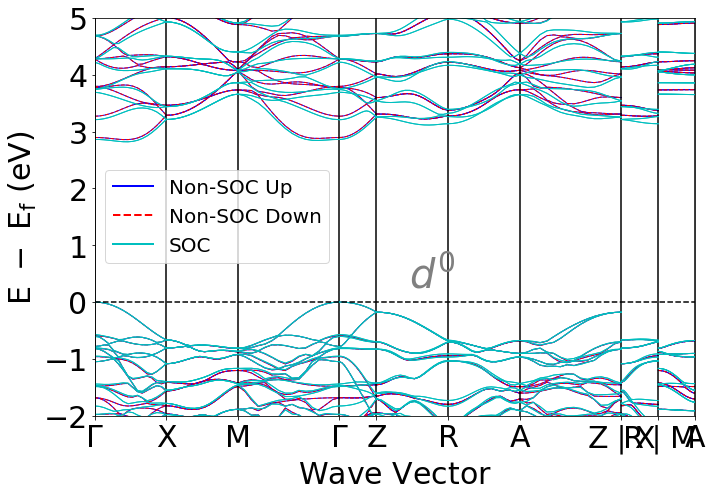

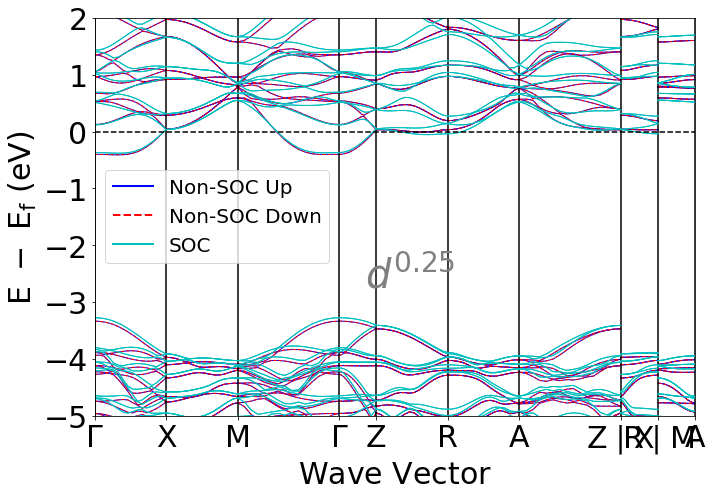

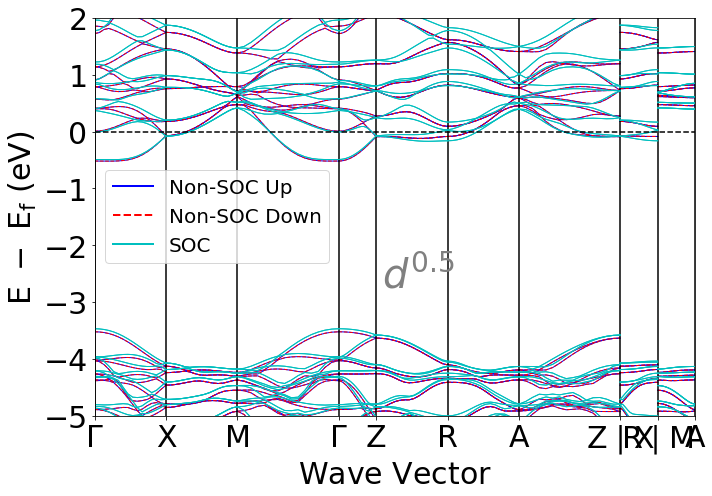

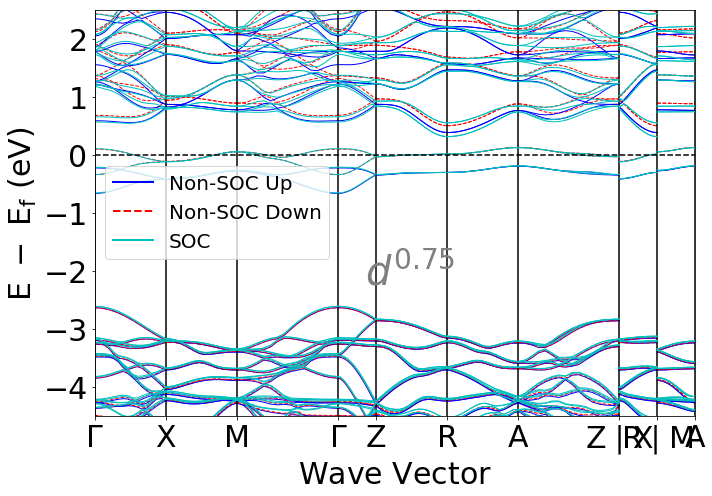

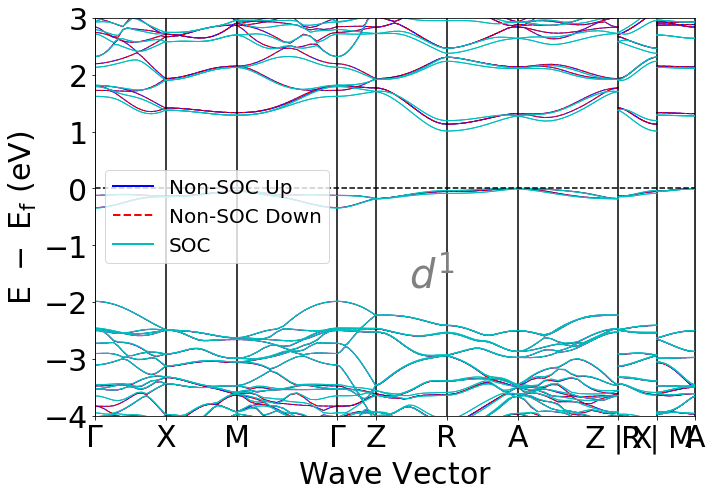

In [4]:
### Plotting some comparisons

for i, suffix in enumerate(['d0','d025','d05','d075', 'd1']):

    p = BSPlotter(bands[suffix])
    psoc = BSPlotter(soc_bands[suffix])
    band_plot = p.plot_compare(psoc)

    ### Formatting
    fig = band_plot.gcf()
    band_plot.ylim(YLIMS[i])



    band_plot.plot([0,10],[0,0],'k--')
    band_plot.text(0.6, 0.3, DOPING_LABELS[i], horizontalalignment='right', verticalalignment='bottom',\
         transform=band_plot.gca().transAxes, fontsize=40, color='grey')
    
    if i != 'd1' and i != 'd075':
        import matplotlib.lines as mlines
        handles = [mlines.Line2D([], [], linewidth=2,
                                         color='b', label='Non-SOC Up'),
                           mlines.Line2D([], [], linewidth=2,
                                         color='r', label='Non-SOC Down',
                                         linestyle="--"),
                           mlines.Line2D([], [], linewidth=2,
                                         color='c', label='SOC')]
        band_plot.legend(handles = handles, fontsize=20, loc=0)
    else:
        band_plot.gca().get_legend().remove()
        
    ### Showing and saving
    fig.set_size_inches(10, 7)    #plt.bs_plot_data(zero_to_efermi=True)
    band_plot.tight_layout() #prevents edges from being cut off
    fig.savefig(f'band-comp-{suffix}.png',dpi=400)
#     fig.savefig(f'band-comp-vec-{suffix}.pdf')
